<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoaharu_Kurosu_2023/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import torch
!pip install torchvision
import torchvision
import torchvision.transforms as transforms

In [2]:
import torchvision

In [16]:
#transform = transform.Compose(
 #   [transform.ToTensor(),
 #    transform.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize(平均, 偏差)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])  # Normalize(平均, 偏差)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


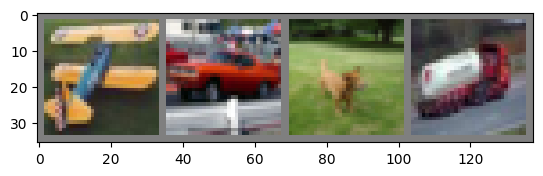

plane   car   dog truck


In [6]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 訓練データをランダムに取得
dataiter = iter(trainloader)
# 訓練データをランダムに取得
images, labels = next(iter(trainloader))
# 画像の表示
imshow(torchvision.utils.make_grid(images))
# ラベルの表示
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


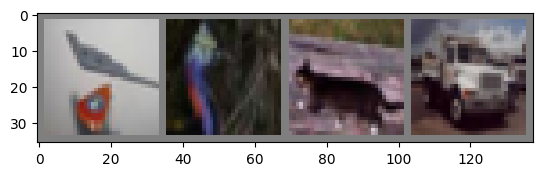

plane  bird   cat truck


In [8]:
import matplotlib.pyplot as plt
import numpy as np
# Notebook形式の場合画像を表示させるのに必要

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 訓練データをランダムに取得
images, labels = next(iter(trainloader))

# 画像の表示
imshow(torchvision.utils.make_grid(images))
# ラベルの表示
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
# ニューラルネットワーク（NN）を構成する際に使用するライブラリ
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    # NNの各構成要素を定義
    def __init__(self):
        super(Net, self).__init__()

        # 畳み込み層とプーリング層の要素定義
        self.conv1 = nn.Conv2d(3, 6, 5)  # (入力, 出力, 畳み込みカーネル（5*5）)
        self.pool = nn.MaxPool2d(2, 2)  # (2*2)のプーリングカーネル
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 全結合層の要素定義
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # (入力, 出力)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # クラス数が１０なので最終出力数は10

    # この順番でNNを構成
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # conv1->relu->pool
        x = self.pool(F.relu(self.conv2(x)))  # conv2->relu->pool
        x = x.view(-1, 16 * 5 * 5)  # データサイズの変更
        x = F.relu(self.fc1(x))  # fc1->relu
        x = F.relu(self.fc2(x))  # fc2->relu
        x = self.fc3(x)
        return x


net = Net()

import torch.optim as optim  #オプティマイザ用のライブラリ

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [10]:
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        # 訓練データから入力画像の行列とラベルを取り出す
        inputs, labels = data

        # 勾配パラメータを０にする
        optimizer.zero_grad()

        # 順伝播 → 逆伝播 → 勾配パラメータの最適化
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 損失関数の変化を2000ミニバッチごとに表示
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 1.903
[1,  4000] loss: 1.602
[1,  6000] loss: 1.518
[1,  8000] loss: 1.455
[1, 10000] loss: 1.422
[1, 12000] loss: 1.383
[2,  2000] loss: 1.291
[2,  4000] loss: 1.299
[2,  6000] loss: 1.295
[2,  8000] loss: 1.278
[2, 10000] loss: 1.274
[2, 12000] loss: 1.280
Finished Training


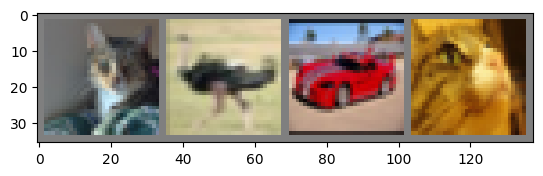

GroundTruth:    cat  bird   car   cat


In [11]:
# 訓練データをランダムに取得
dataiter = iter(testloader)
images, labels = next(iter(trainloader))
# 画像の表示
imshow(torchvision.utils.make_grid(images))
# ラベルの表示
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [12]:

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 51 %


In [13]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 68 %
Accuracy of   car : 55 %
Accuracy of  bird : 51 %
Accuracy of   cat : 25 %
Accuracy of  deer : 49 %
Accuracy of   dog : 32 %
Accuracy of  frog : 71 %
Accuracy of horse : 63 %
Accuracy of  ship : 44 %
Accuracy of truck : 52 %
